<a href="https://colab.research.google.com/github/Dejan-Cugalj/MASTER-TEZA/blob/main/MASTER_TEZA_PLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Predikcija ispravnog očitavanje senzora mase protoka vazduha motora automobila"**
## *MASTER TEZA*
---

#### Mentori:
#### ***Prof. dr. Marina Marjanović Jakovljević***
####***Prof. dr. Miodrag Živković***
### Student: **Dejan Čugalj (2019/430054)**


---
#1. Struktura skupa podataka (dataseta)
[Preuzimanje skupa podataka](https://github.com/Dejan-Cugalj/CANBUS_dataset/blob/main/golf-master-canbus_dataset.csv)
---

>### 1.1 - Učitavanje potrebnih **biblioteka**


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Sistemske
import datetime, os, time
# Numerika
import numpy as np
import pandas as pd
import pandas.util.testing as tm
from sklearn.preprocessing import StandardScaler
# Linearna Regresija
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#Evaluacija
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import statsmodels.api as sm
#Grafika
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
print("*********** Učitane Biblioteke... ********************\n")

*********** Učitane Biblioteke... ********************



>### 1.2 - Učitavanje skupa podataka (eng *dataset*)

> **LEGENDA DATASETA:**

*   **RPM** - **R**EVOLUTIONS **P**ER **M**INUTE sensor
*   **MAP** - **M**ANIFOLD **A**BSOLUTE **P**RESSURE sensor
*   **FGP** - **F**UEL **G**AUGE **P**RESSURE sensor
*   **IAT** - **I**NTAKE **A**IR **T**EMPERATURE sensor
*   **ECT** - **E**NGINE **C**OOLANT **T**EMPERATURE sensor
*   **CEL** - **C**ALCULATED **E**NGINE **L**OAD
*   **ABP** - **A**BSOLUTE **B**AROMETRIC **P**RESSURE
*   **MAF** - **M**ASS **A**IR **F**LOW sensor 








In [19]:
url = '/content/drive/MyDrive/FAKULTET/MASTER STUDIJE/MASTER TEZA-RAD/MATERIJAL/AI/1-PLR/golf-master-canbus_dataset.csv' # Uneti putanju do preuzetog dataseta

In [20]:
dataset = pd.read_csv(url ,sep=',', usecols = ['RPM', 'MAP', 'FGP', 'MAF'])
dataset.columns=['RPM', 'MAP', 'FGP', 'MAF']

print("*********** Ucitan DATASET... ********************\n")

*********** Ucitan DATASET... ********************



>### 1.3 Preprocesuiranje podataka

In [21]:
print("*********** DATASET ********************\n")
print(dataset.head(10))

*********** DATASET ********************

      RPM  MAP    FGP    MAF
0  946.00   87  23580  11.42
1  947.00   87  23730  11.52
2  950.75   87  25820  11.87
3  945.50   87  24510  11.26
4  951.25   87  25050  11.38
5  950.00   87  26700  11.90
6  949.50   87  25870  10.98
7  949.00   87  26180  11.44
8  951.00   87  26810  11.05
9  949.25   87  25930  11.41


> #### 3.1 Kreiranje Pandas Data-Frejma

In [22]:
# Odbacivanje obeležija koje nisu u korelaciji
#dataset.drop(['IAT', 'ECT', 'CEL', 'ABP'], axis=1, inplace=True)
 
X = dataset.iloc[:, :-1].values # Alokacija Matrice Obeležija / Nezavisnih Promenjivih (eng. Independent variables)
y = dataset.iloc[:, -1].values # Alokacija Zavisne Promenjive (eng. Dependent variable) MAF sernzora automobila
print("**************************************************************")
print("**************** KREIRAN PANDAs DATA FREJM ******************")
print("**************************************************************\n")
print("*************************   X   ************************\n")
print(X)
print("\n\n\n*************************   y   ************************\n")
print(y)

**************************************************************
**************** KREIRAN PANDAs DATA FREJM ******************
**************************************************************

*************************   X   ************************

[[  946.      87.   23580.  ]
 [  947.      87.   23730.  ]
 [  950.75    87.   25820.  ]
 ...
 [  878.75    87.   24510.  ]
 [  879.25    87.   26730.  ]
 [  878.75    87.   23680.  ]]



*************************   y   ************************

[11.42 11.52 11.87 ...  9.41  9.5   9.57]


>### 1.4 Sticanje uvida u prirodu podataka

>#### 1.4.1 Dataset info

In [23]:
print("*******************************************")
print("**************** DATASET ******************")
print("*******************************************")
print(dataset.head(10))
print("\n*****************************************************")
print("*************** PRIKAZ INDEX POLJA ******************")
print("*****************************************************")
print(dataset.keys()) # Prikaz indexa
print("\n********************************************************************")
print("*********** Prikaz polja ukoliko postoje ""NaN"" vrednosti ************")
print("********************************************************************")
print(dataset.isnull().sum()) # Prikaz polja ukoliko postoije "NaN" vrednosti 
print("\n**********************************************************************")
print("**************** Prikaz oblika učitanog dataseta *********************")
print("**********************************************************************")
print(dataset.shape) # Prikaz oblika učitanog dataseta
print("\n****************************************************")
print("******************** Dataset Info ******************")
print("****************************************************")
print(dataset.info()) # Prikaz oblika učitanog dataseta

*******************************************
**************** DATASET ******************
*******************************************
      RPM  MAP    FGP    MAF
0  946.00   87  23580  11.42
1  947.00   87  23730  11.52
2  950.75   87  25820  11.87
3  945.50   87  24510  11.26
4  951.25   87  25050  11.38
5  950.00   87  26700  11.90
6  949.50   87  25870  10.98
7  949.00   87  26180  11.44
8  951.00   87  26810  11.05
9  949.25   87  25930  11.41

*****************************************************
*************** PRIKAZ INDEX POLJA ******************
*****************************************************
Index(['RPM', 'MAP', 'FGP', 'MAF'], dtype='object')

********************************************************************
*********** Prikaz polja ukoliko postoje NaN vrednosti ************
********************************************************************
RPM    0
MAP    0
FGP    0
MAF    0
dtype: int64

**********************************************************************
******

>#### 1.4.2 Prikaz korelacione matrice (numerički)

In [24]:
print("\n*******************************************************************")
print("***************** Numerička Korelaciona Matrica *******************")
print("*******************************************************************")
print(dataset.info()) # dataset info
corrMatrix = dataset.corr()
print (corrMatrix) # Numrerički prikaz korelacione matrice


*******************************************************************
***************** Numerička Korelaciona Matrica *******************
*******************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2759 entries, 0 to 2758
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPM     2759 non-null   float64
 1   MAP     2759 non-null   int64  
 2   FGP     2759 non-null   int64  
 3   MAF     2759 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 86.3 KB
None
          RPM       MAP       FGP       MAF
RPM  1.000000  0.913430  0.957484  0.984641
MAP  0.913430  1.000000  0.922442  0.953109
FGP  0.957484  0.922442  1.000000  0.974711
MAF  0.984641  0.953109  0.974711  1.000000


>#### 1.4.3 Prikaz korelacione matrice (grafički)


*******************************************************************
***************** Grafička Korelaciona Matrica ********************
*******************************************************************


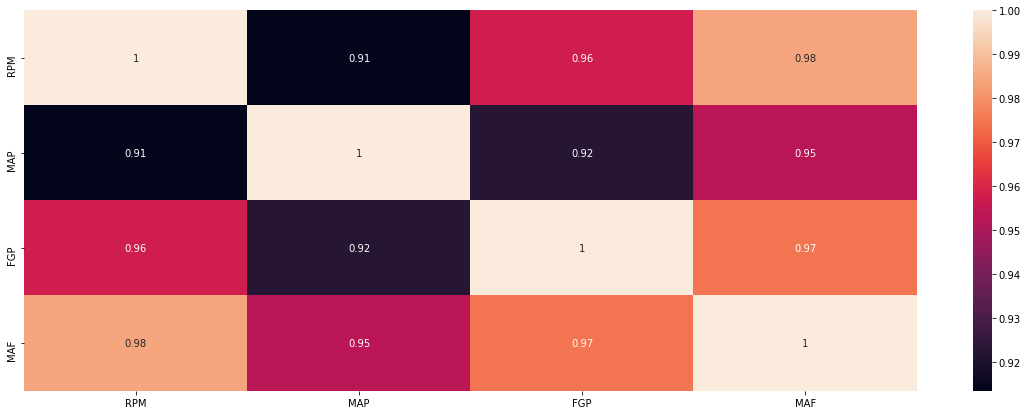

In [25]:
# Grafički prikaz korelacione matrice
print("\n*******************************************************************")
print("***************** Grafička Korelaciona Matrica ********************")
print("*******************************************************************")
 
plt.figure(figsize=(20,7))
sns.heatmap(corrMatrix, annot=True, square=False)

>#### 1.4.4 Prikaz uporednih analiza linearnost (grafički)

In [26]:
# Skaliranje Obeležija (eng. Feature Scaling)
sc = StandardScaler()
podaci = sc.fit_transform(dataset)
podaci_dataframe = pd.DataFrame(podaci) # Iz 'ndarray' u Pandas Data-Frame
podaci_dataframe.columns = ['RPM','MAP','FGP','MAF']

MAF_small = podaci_dataframe.MAF[30:350]

RPM_small = podaci_dataframe.RPM[30:350]
MAP_small = podaci_dataframe.MAP[30:350]
FGP_small = podaci_dataframe.FGP[30:350]
#podaci_dataframe.plot.hist(bins=50)
#podaci_dataframe.hist()

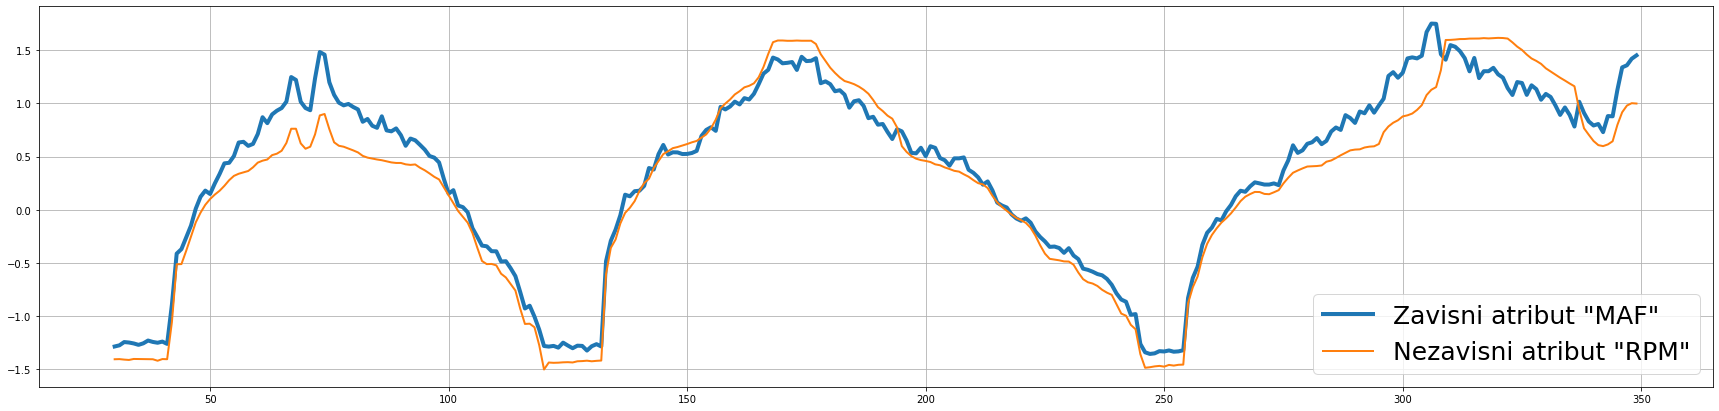

In [27]:
plt.figure(figsize=(30,7))
plt.plot(MAF_small, label='Zavisni atribut "MAF"', linewidth=4) # Zavisni atribut "MAF"
plt.plot(RPM_small, label='Nezavisni atribut "RPM"', linewidth=2) # 'Nezavisni atribut "RPM"
plt.grid()
plt.legend(loc="lower right", fontsize=25)
plt.xlabel('');

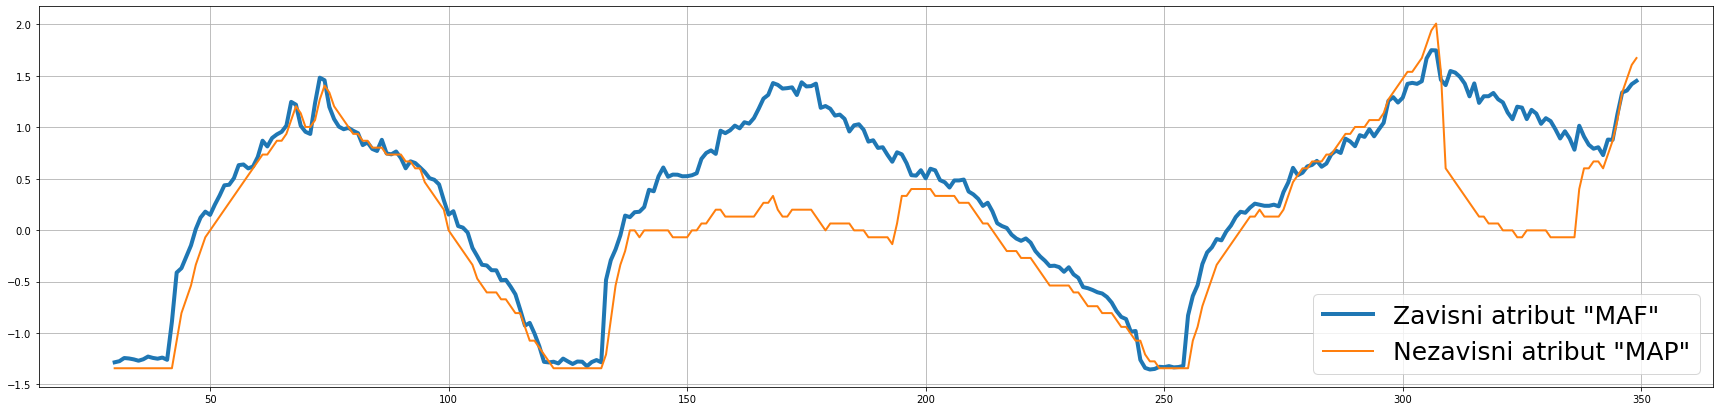

In [28]:
plt.figure(figsize=(30,7))
plt.plot(MAF_small, label='Zavisni atribut "MAF"', linewidth=4) # Zavisni atribut "MAF"
plt.plot(MAP_small, label='Nezavisni atribut "MAP"', linewidth=2) # 'Nezavisni atribut "MAP"
plt.grid()
plt.legend(loc="lower right", fontsize=25)
plt.xlabel('');

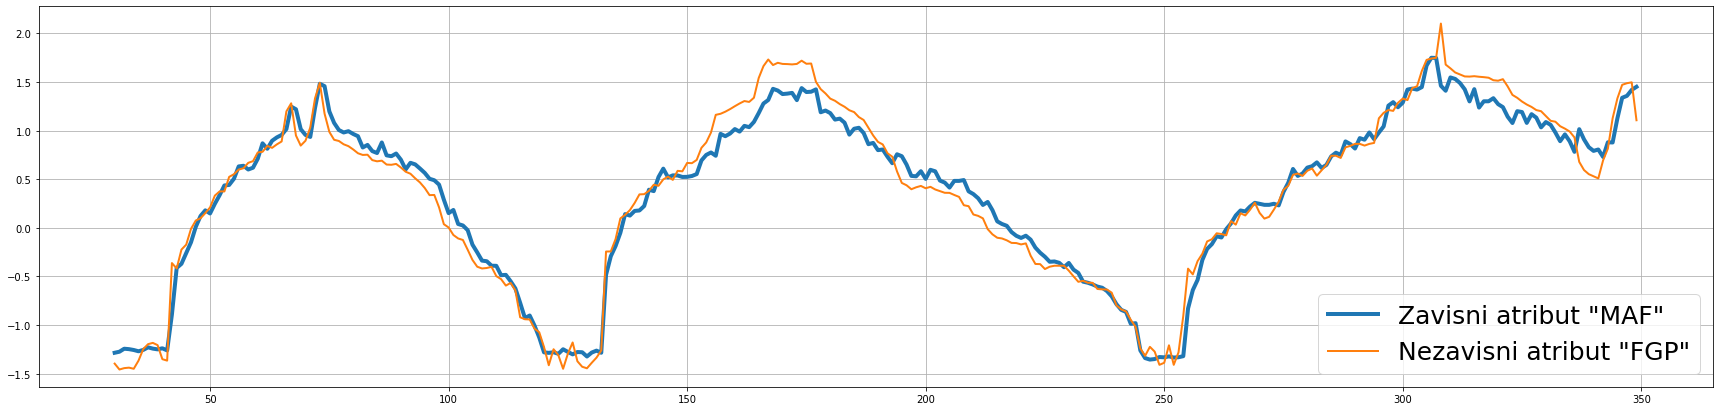

In [29]:
plt.figure(figsize=(30,7))
plt.plot(MAF_small, label='Zavisni atribut "MAF"', linewidth=4) # Zavisni atribut "MAF"
plt.plot(FGP_small, label='Nezavisni atribut "FGP"', linewidth=2) # 'Nezavisni atribut "FGP"
plt.grid()
plt.legend(loc="lower right", fontsize=25)
plt.xlabel('');

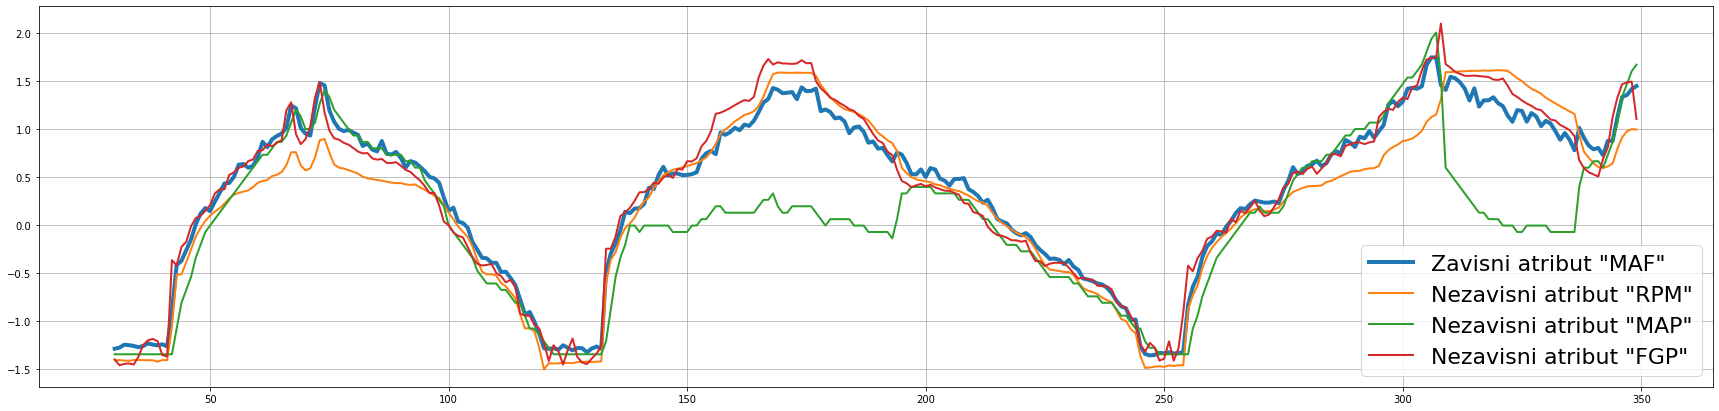

In [30]:
plt.figure(figsize=(30,7))
plt.plot(MAF_small, label='Zavisni atribut "MAF"', linewidth=4) # Zavisni atribut "MAF"
plt.plot(RPM_small, label='Nezavisni atribut "RPM"', linewidth=2) # 'Nezavisni atribut "RPM"
plt.plot(MAP_small, label='Nezavisni atribut "MAP"', linewidth=2) # 'Nezavisni atribut "MAP"
plt.plot(FGP_small, label='Nezavisni atribut "FGP"', linewidth=2) # 'Nezavisni atribut "FGP"
plt.grid()
plt.legend(loc="lower right", fontsize=22)
plt.xlabel('');

---
#2. Prosta Linearna Regresija (PLR)
---